In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as signal
import scipy.ndimage as nd

from skimage import io
from skimage import color
import time


Image shape:  (598, 282)
Image type:  float64
Min/Max: 0.0 1.0


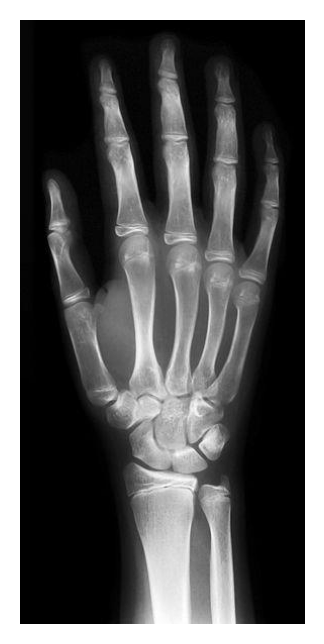

In [ ]:

image = io.imread("foto.png")

#rgb2gray
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) # normalize to [0-1]
image = normalize(image)
image = color.rgb2gray(image)


print("Image shape: ", image.shape)
print("Image type: ", image.dtype)
print("Min/Max:", np.min(image), np.max(image))

plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def uniform_filter(image, filter_size):
  return nd.uniform_filter(image, filter_size)
 
def gaussian_filter(image, sigma):
  return nd.gaussian_filter(image, sigma)

def median_filter(image, filter_size):
  return nd.median_filter(image, filter_size)

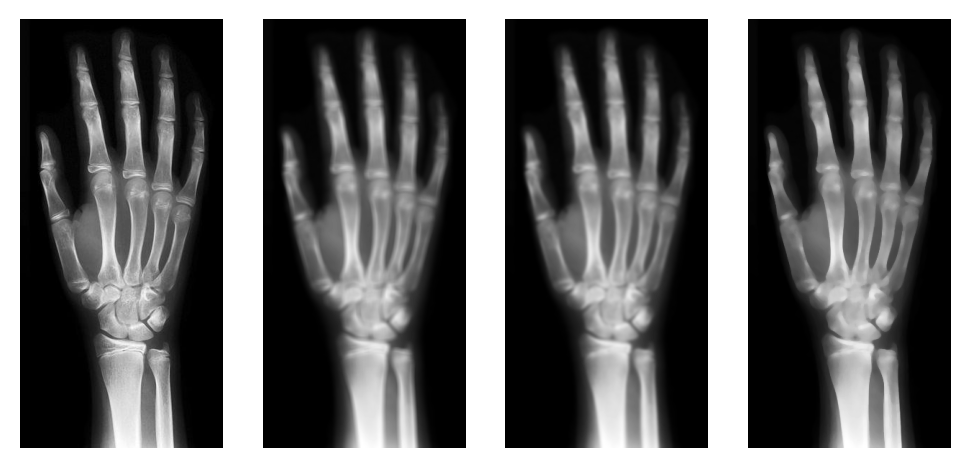

In [ ]:
uni_image = uniform_filter(image, 7)
gaussian_image = gaussian_filter(image, 2)
median_image = median_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 283.5, 599.5, -0.5)

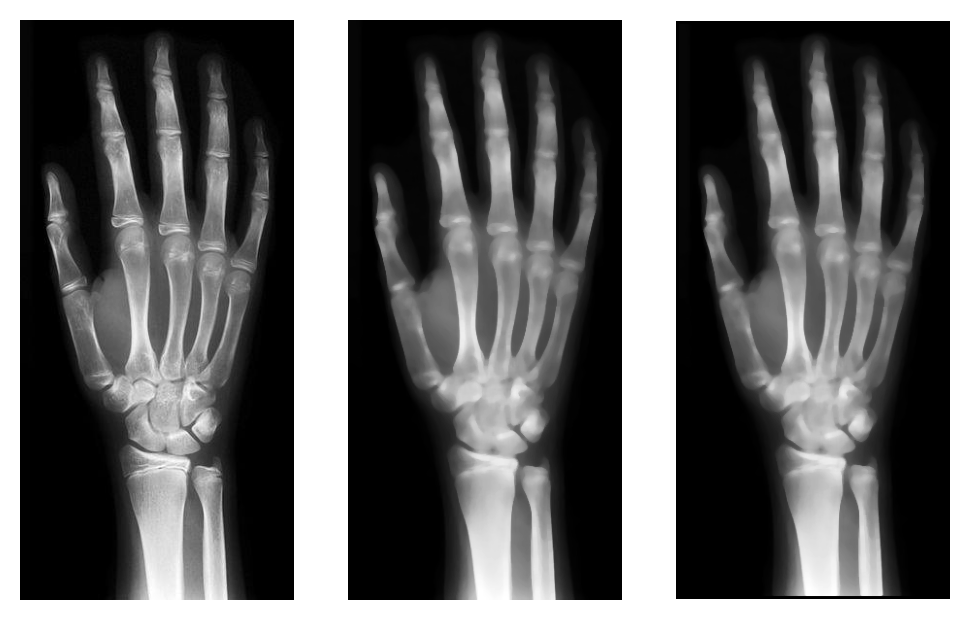

In [ ]:
def our_median_filt(image, se):
 
  def generate_size(se, coord):
    if se.shape[coord]==1:
      return 1
    else:
      return int((se.shape[coord] - se.shape[coord]%2)/2)

  dim_y = generate_size(se, 0) 
  dim_x = generate_size(se, 1) 
  
  new_matrix_y=image.shape[0]+int(2*dim_y)
  new_matrix_x=image.shape[1]+int(2*dim_x)

  processed_image = np.zeros((new_matrix_y,new_matrix_x))
  processed_image[dim_y:(dim_y + image.shape[0]), dim_x:(dim_x + image.shape[1])] = image
  final_image = np.zeros((new_matrix_y,new_matrix_x))


  for y in range (dim_y,processed_image.shape[0]):
    for x in range (dim_x,processed_image.shape[1]):
      if ( ((y+2*dim_y)< processed_image.shape[0]) and ((x+2*dim_x) < processed_image.shape[1]) ) :
        temp = np.median((processed_image[y-dim_y:y+dim_y+1,x-dim_x:x+dim_x+1])* se )
        final_image[y,x] = temp
  
  return final_image 
  
image = io.imread("foto.png")
image=color.rgb2gray(image)
se=np.ones((7,7))

IMG=our_median_filt(image, se)
median_image = median_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(IMG, cmap='gray')
plt.axis('off')


(-0.5, 283.5, 599.5, -0.5)

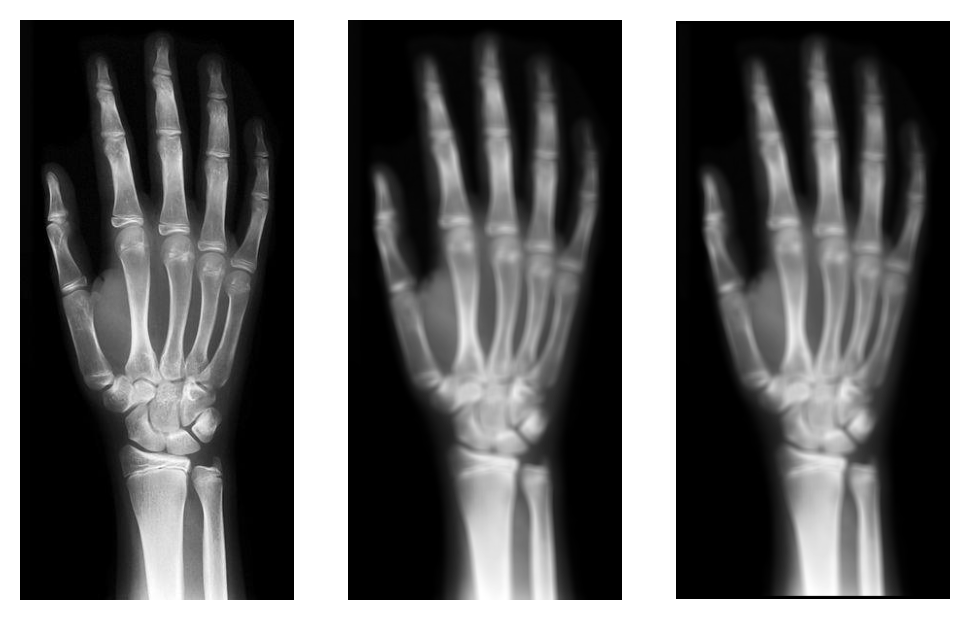

In [ ]:
def our_uniform_filt(image, se):

 
  def generate_size(se, coord):
    if se.shape[coord]==1:
      return 1
    else:
      return int((se.shape[coord] - se.shape[coord]%2)/2)

  dim_y = generate_size(se, 0) 
  dim_x = generate_size(se, 1) 
  
  new_matrix_y=image.shape[0]+int(2*dim_y)
  new_matrix_x=image.shape[1]+int(2*dim_x)

  processed_image = np.zeros((new_matrix_y,new_matrix_x))
  processed_image[dim_y:(dim_y + image.shape[0]), dim_x:(dim_x + image.shape[1])] = image
  final_image = np.zeros((new_matrix_y,new_matrix_x))


  for y in range (dim_y,processed_image.shape[0]):
    for x in range (dim_x,processed_image.shape[1]):
      if ( ((y+2*dim_y)< processed_image.shape[0]) and ((x+2*dim_x) < processed_image.shape[1]) ) :
        temp = np.mean((processed_image[y-dim_y:y+dim_y+1,x-dim_x:x+dim_x+1])* se )
        final_image[y,x] = temp
  
  return final_image 

image = io.imread("foto.png")
image=color.rgb2gray(image)
se=np.ones((7,7))

IMG=our_uniform_filt(image, se)
uni_image = uniform_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(IMG, cmap='gray')
plt.axis('off')

In [ ]:
def my_gaussian_filter(image, sigma=3):
  filter_size = 2 * int(4 * sigma + 0.5) + 1
  gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
  
  m = filter_size//2
  n = filter_size//2
    
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      x1 = 2*np.pi*(sigma**2)
      x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
      gaussian_filter[x+m, y+n] = (1/x1)*x2
    
  final_image = np.zeros_like(image, dtype=np.float32)
  final_image[:, :] = convolution(image[:, :], gaussian_filter)

  return im_filtered
